# Image Classifier using CNN

In [55]:
import tensorflow as tf
import os

## Avoid OOM errors by setting GPU Memory Consumption Growth

In [3]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

## Import form data directory

In [4]:
train_dir = 'data/train'
val_dir = 'data/val'
os.listdir(train_dir)

['NORMAL', 'PNEUMONIA']

In [5]:
import numpy as np
from matplotlib import pyplot as plt

In [6]:
val_data = tf.keras.utils.image_dataset_from_directory(val_dir)
train_data = tf.keras.utils.image_dataset_from_directory(train_dir)

Found 16 files belonging to 2 classes.
Found 5216 files belonging to 2 classes.


In [15]:
train_data_iterator = train_data.as_numpy_iterator()

In [16]:
train_batch = train_data_iterator.next()
train_batch[0].shape

(32, 256, 256, 3)

In [17]:
train_batch[1]

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1])

## Visualize training data

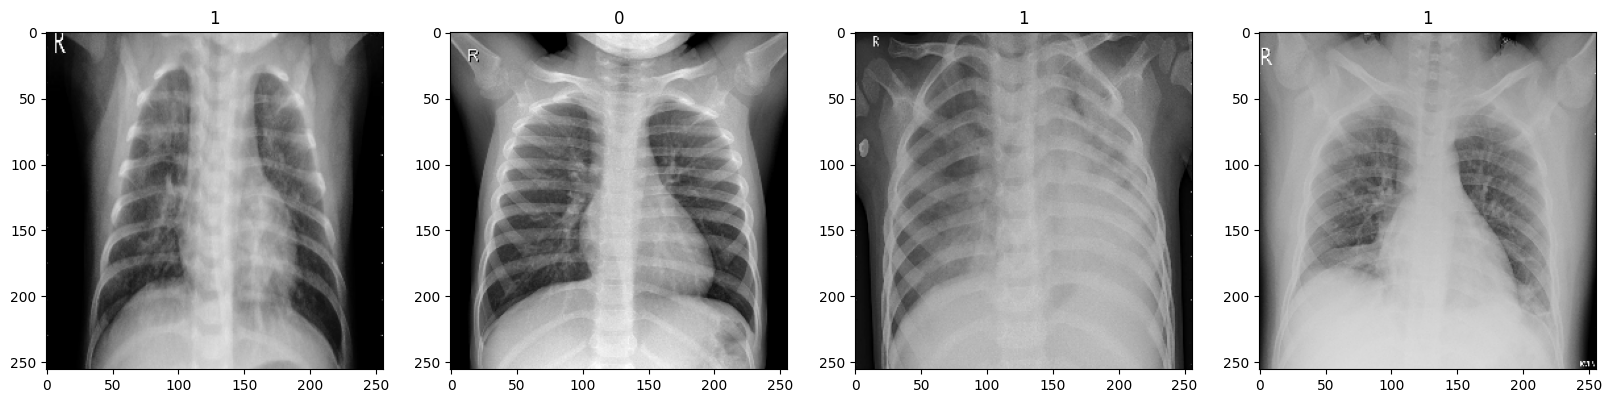

In [18]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(train_batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(train_batch[1][idx])

In [19]:
train_data = train_data.map(lambda x,y: (x/255, y))
val_data = val_data.map(lambda x,y: (x/255, y))

train_data.as_numpy_iterator().next()
val_data.as_numpy_iterator().next()

In [21]:
val_data.as_numpy_iterator().next()[0].max()

1.0

## Train and validation data loaded

In [22]:
train = train_data.take(int(len(train_data)))
val= val_data.take(int(len(val_data)))


In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

## CNN Architechture

In [24]:
model = Sequential()

In [25]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [26]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

## Train the model at 11 epochs

In [28]:
logdir='logs'

In [29]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [30]:
hist = model.fit(train, epochs=11, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/11


163/163 [==============================] - 40s 216ms/step - loss: 0.1964 - accuracy: 0.9204 - val_loss: 0.6301 - val_accuracy: 0.7500
Epoch 2/11
163/163 [==============================] - 33s 200ms/step - loss: 0.1111 - accuracy: 0.9605 - val_loss: 0.1631 - val_accuracy: 0.9375
Epoch 3/11
163/163 [==============================] - 33s 199ms/step - loss: 0.0859 - accuracy: 0.9693 - val_loss: 0.3210 - val_accuracy: 0.7500
Epoch 4/11
163/163 [==============================] - 32s 196ms/step - loss: 0.0601 - accuracy: 0.9778 - val_loss: 0.2602 - val_accuracy: 0.8125
Epoch 5/11
163/163 [==============================] - 33s 198ms/step - loss: 0.0415 - accuracy: 0.9845 - val_loss: 0.3350 - val_accuracy: 0.8125
Epoch 6/11
163/163 [==============================] - 33s 200ms/step - loss: 0.0451 - accuracy: 0.9835 - val_loss: 0.0957 - val_accuracy: 0.9375
Epoch 7/11
163/163 [==============================] - 37s 222ms/step - loss: 0.0210 - accuracy: 0.9929 - val_loss: 0.1638 - val_

## Loss Graph

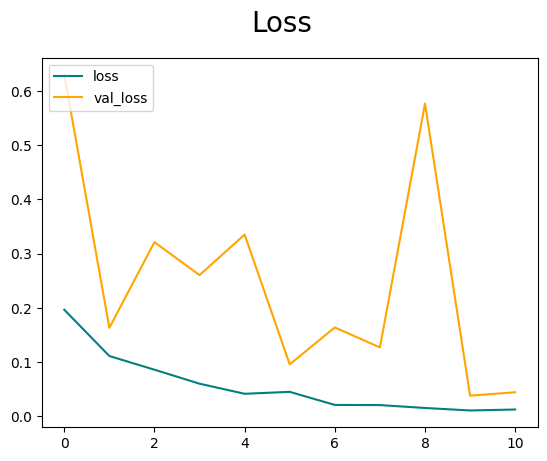

In [31]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

## Accuracy Graph

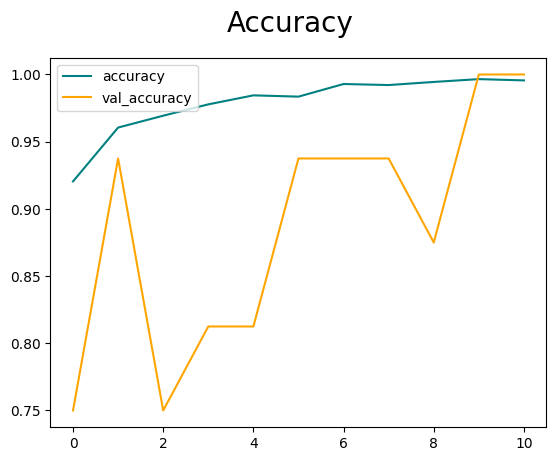

In [52]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [33]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [34]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

## Loading Test data

In [35]:
test_data = tf.keras.utils.image_dataset_from_directory('data/test')

Found 624 files belonging to 2 classes.


In [36]:
test_data = test_data.map(lambda x,y: (x/255, y))
test_data.as_numpy_iterator().next()
test = test_data.take(int(len(test_data)))

## Testing our model against test data

In [37]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 290ms/step


## F1 Score

In [38]:
f1_score = (2 * (pre.result().numpy() * re.result().numpy())) / (pre.result().numpy() + re.result().numpy())
f1_score

0.8568207774686818

## Precision, Recall and Accuracy

In [39]:
print(f'Recall: {re.result().numpy()},Accuracy: {acc.result().numpy()},Precision: {pre.result().numpy()}')

Recall: 0.9743589758872986,Accuracy: 0.7964743375778198,Precision: 0.7645875215530396


In [40]:
import cv2

## Manually testing a normal image

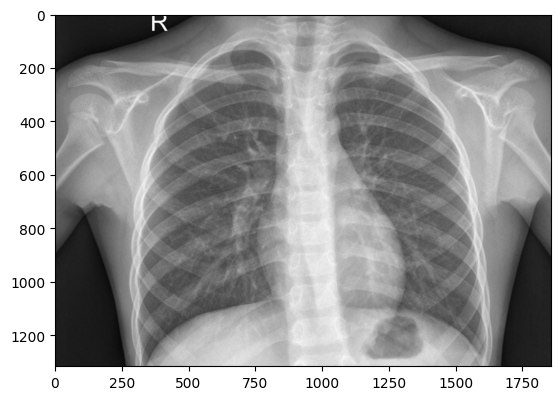

In [41]:
img = cv2.imread('IM-0001-0001.jpeg')
plt.imshow(img)
plt.show()

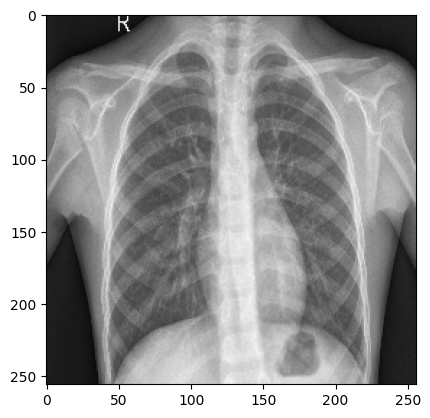

In [43]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [44]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 89ms/step


In [45]:
yhat

array([[0.0831161]], dtype=float32)

In [46]:
model.save(os.path.join('models','normalPneumoniaV2.keras'))

## Predicted image is normal

In [47]:
if yhat > 0.5: 
    print(f'Predicted class Has Pneumonia')
else:
    print(f'Predicted class is Normal')

Predicted class is Normal


## Again Manually testing a pneumonia image

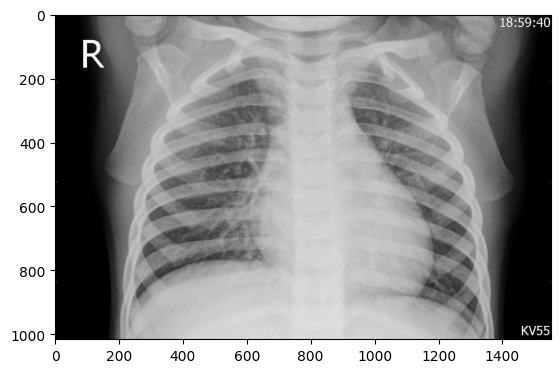

In [48]:
img = cv2.imread('person35_virus_80.jpeg')
plt.imshow(img)
plt.show()

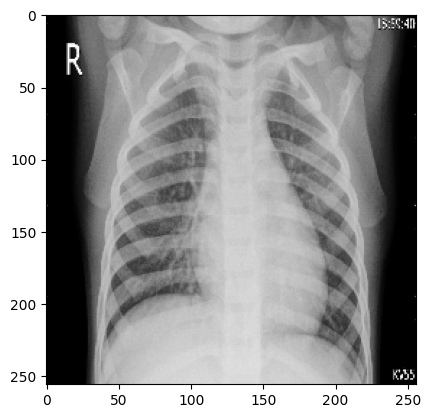

In [49]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [50]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 69ms/step


## Predicted class has Pneumonia

In [51]:
if yhat > 0.5: 
    print(f'Predicted class Has Pneumonia')
else:
    print(f'Predicted class is Normal')

Predicted class Has Pneumonia
